In [ ]:
#Importing Required Libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from keras.utils import image_dataset_from_directory
import tensorflow as tf
from keras.applications.vgg16 import VGG16
import os
print("TF version:", tf.__version__)
import keras
print("Keras version:", keras.__version__)

TF version: 2.15.0
Keras version: 2.15.0


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

100% 1.98G/1.98G [01:24<00:00, 25.2MB/s]
100% 1.98G/1.98G [01:24<00:00, 25.3MB/s]


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
!unzip /content/fruit-and-vegetable-image-recognition.zip

Archive:  /content/fruit-and-vegetable-image-recognition.zip
  inflating: test/apple/Image_1.jpg  
  inflating: test/apple/Image_10.jpg  
  inflating: test/apple/Image_2.jpg  
  inflating: test/apple/Image_3.jpg  
  inflating: test/apple/Image_4.jpg  
  inflating: test/apple/Image_5.jpg  
  inflating: test/apple/Image_6.JPG  
  inflating: test/apple/Image_7.jpg  
  inflating: test/apple/Image_8.jpg  
  inflating: test/apple/Image_9.jpg  
  inflating: test/banana/Image_1.jpg  
  inflating: test/banana/Image_10.jpg  
  inflating: test/banana/Image_2.jpg  
  inflating: test/banana/Image_3.jpg  
  inflating: test/banana/Image_4.jpg  
  inflating: test/banana/Image_5.jpg  
  inflating: test/banana/Image_6.jpg  
  inflating: test/banana/Image_8.jpg  
  inflating: test/banana/Image_9.jpg  
  inflating: test/beetroot/Image_1.jpg  
  inflating: test/beetroot/Image_10.jpg  
  inflating: test/beetroot/Image_2.jpg  
  inflating: test/beetroot/Image_3.jpg  
  inflating: test/beetroot/Image_4.jpg  


In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf

# Create a list with the filepaths for training and testing
train_dir = Path('/content/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

test_dir = Path('/content/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

val_dir = Path('/content/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))
def proc_img(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)

    return df

train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)
val_df = proc_img(val_filepaths)


In [ ]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2780

Number of different labels: 36

Labels: ['capsicum' 'eggplant' 'chilli pepper' 'peas' 'lettuce' 'carrot'
 'soy beans' 'pomegranate' 'cauliflower' 'turnip' 'raddish' 'spinach'
 'lemon' 'mango' 'jalepeno' 'beetroot' 'sweetcorn' 'pineapple' 'potato'
 'cucumber' 'cabbage' 'orange' 'pear' 'corn' 'tomato' 'garlic'
 'sweetpotato' 'banana' 'paprika' 'apple' 'watermelon' 'grapes'
 'bell pepper' 'ginger' 'onion' 'kiwi']


In [ ]:
# The DataFrame with the filepaths in one column and the labels in the other one
train_df.head(5)

Filepath          Label
0       /content/train/capsicum/Image_86.jpg       capsicum
1       /content/train/eggplant/Image_29.jpg       eggplant
2       /content/train/capsicum/Image_92.jpg       capsicum
3  /content/train/chilli pepper/Image_31.jpg  chilli pepper
4           /content/train/peas/Image_21.jpg           peas

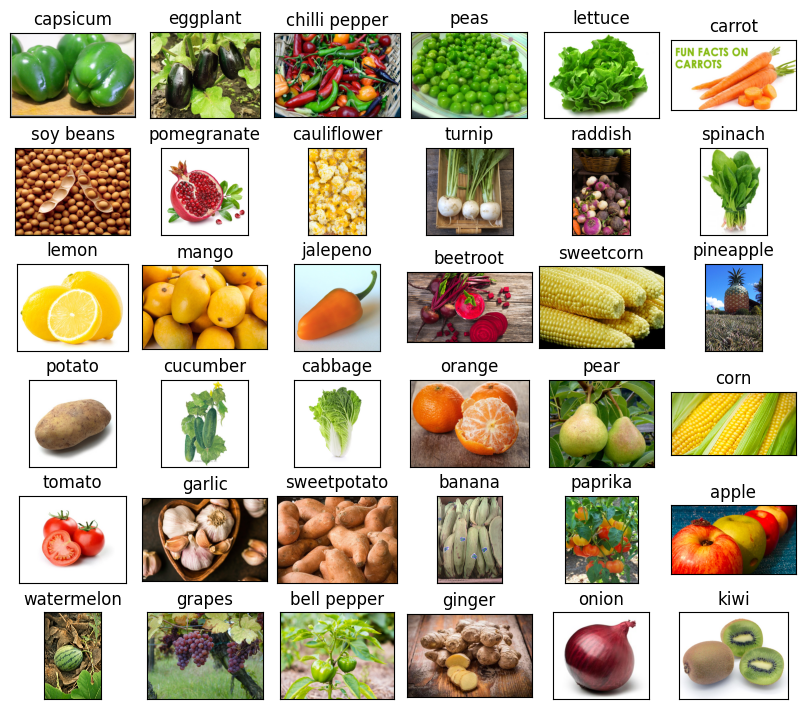

In [ ]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 2780 validated image filenames belonging to 36 classes.
Found 334 validated image filenames belonging to 36 classes.
Found 334 validated image filenames belonging to 36 classes.


In [ ]:
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



Epoch 1/5
87/87 [==============================] - 216s 2s/step - loss: 1.7835 - accuracy: 0.5291 - val_loss: 0.5084 - val_accuracy: 0.8234
Epoch 2/5
87/87 [==============================] - 185s 2s/step - loss: 0.5754 - accuracy: 0.8205 - val_loss: 0.2972 - val_accuracy: 0.9102
Epoch 3/5
87/87 [==============================] - 193s 2s/step - loss: 0.3388 - accuracy: 0.8942 - val_loss: 0.2222 - val_accuracy: 0.9311
Epoch 4/5
87/87 [==============================] - 184s 2s/step - loss: 0.2170 - accuracy: 0.9324 - val_loss: 0.2420 - val_accuracy: 0.9431
Epoch 5/5
87/87 [==============================] - 202s 2s/step - loss: 0.1549 - accuracy: 0.9507 - val_loss: 0.1806 - val_accuracy: 0.9371


In [ ]:
history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
87/87 [==============================] - 211s 2s/step - loss: 0.0520 - accuracy: 0.9831 - val_loss: 0.1764 - val_accuracy: 0.9701
Epoch 2/5
87/87 [==============================] - 194s 2s/step - loss: 0.0469 - accuracy: 0.9849 - val_loss: 0.1443 - val_accuracy: 0.9701
Epoch 3/5
87/87 [==============================] - 215s 2s/step - loss: 0.0252 - accuracy: 0.9903 - val_loss: 0.1315 - val_accuracy: 0.9731
Epoch 4/5
87/87 [==============================] - 201s 2s/step - loss: 0.0248 - accuracy: 0.9917 - val_loss: 0.1330 - val_accuracy: 0.9790
Epoch 5/5
87/87 [==============================] - 185s 2s/step - loss: 0.0252 - accuracy: 0.9914 - val_loss: 0.1445 - val_accuracy: 0.9701


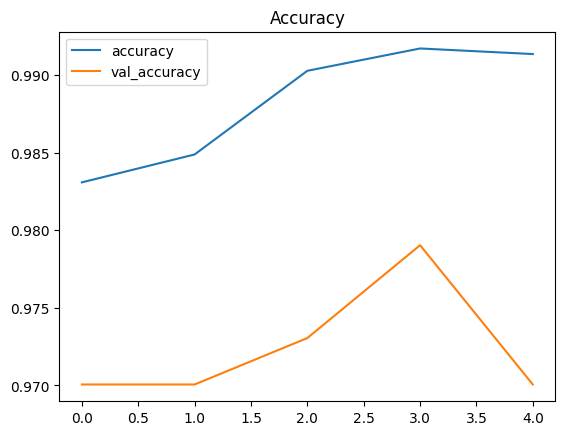

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

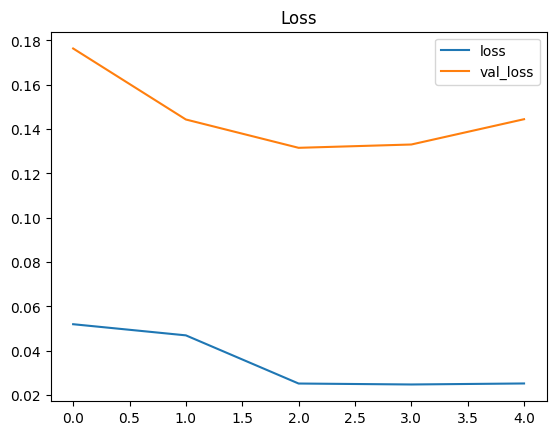

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

11/11 [==============================] - 27s 2s/step


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 97.31%


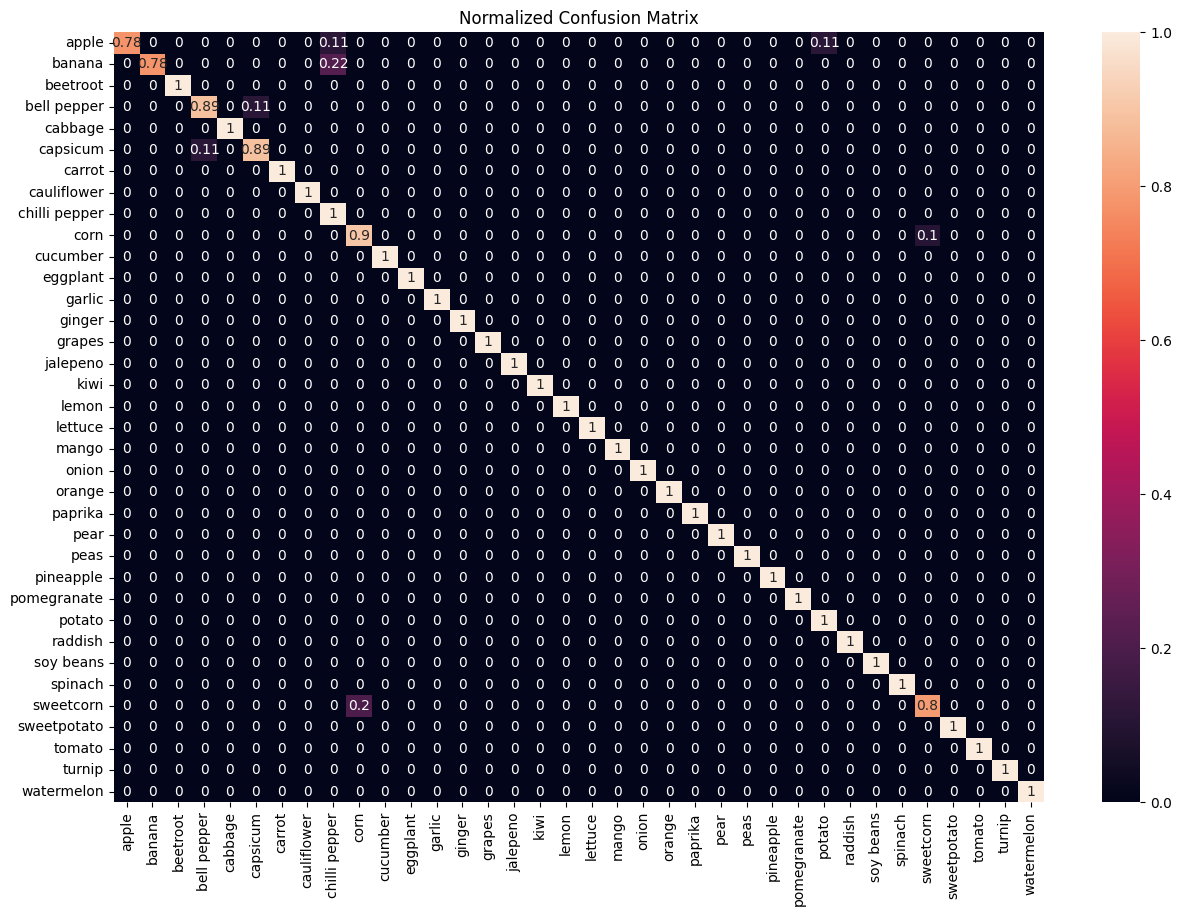

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix,
            annot=True,
            xticklabels = sorted(set(y_test)),
            yticklabels = sorted(set(y_test)),
            )
plt.title('Normalized Confusion Matrix')
plt.show()

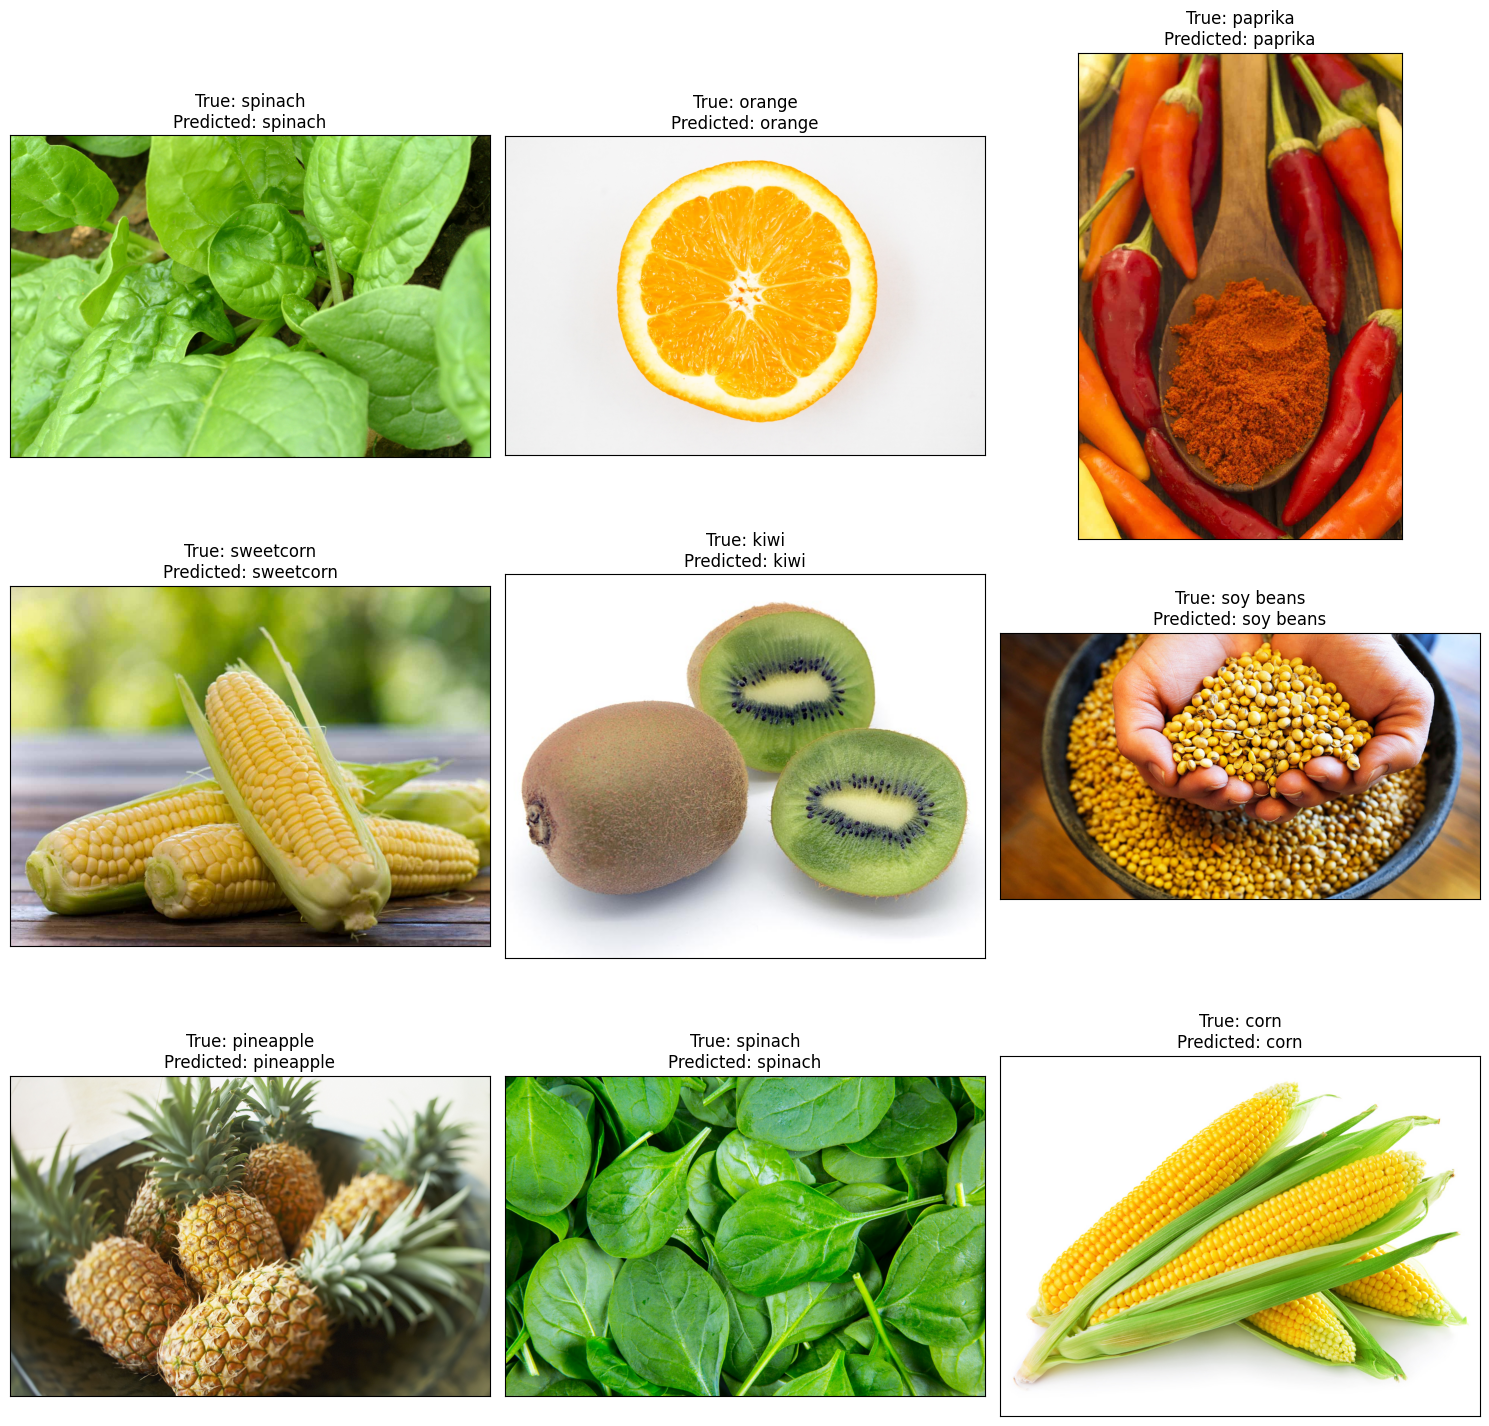

In [ ]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
model_version=max([int(i) for i in os.listdir("/content/drive/MyDrive/Plants_model") + [0]])+1
model.save(f"/content/drive/MyDrive/Plants_model/{model_version}")

In [ ]:
model.save("../fruits-vegetables.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("plants_model.tflite", 'wb') as f :
  f.write(tflite_model)

In [ ]:
model.save('plants.h5')